In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stt

import warnings
warnings.filterwarnings('ignore')

In [178]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

In [179]:
train.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [180]:
test.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


## Column Info

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [181]:
train.shape

(8693, 14)

In [182]:
test.shape

(4277, 13)

In [183]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [184]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [185]:
train['HomePlanet'].fillna((train['HomePlanet'].mode())[0], inplace = True)
test['HomePlanet'].fillna((test['HomePlanet'].mode())[0], inplace = True)

train['CryoSleep'].fillna(False, inplace = True)
test['CryoSleep'].fillna(False, inplace = True)

train['Cabin'].fillna("U/-1/U", inplace = True)
test['Cabin'].fillna("U/-1/U", inplace = True)

train['Age'].fillna((train['Age'].mean()), inplace = True)
test['Age'].fillna((test['Age'].mean()), inplace = True)

train['VIP'].fillna(False, inplace = True)
test['VIP'].fillna(False, inplace = True)

train['RoomService'].fillna(0.0, inplace = True)
test['RoomService'].fillna(0.0, inplace = True)

train['FoodCourt'].fillna(0.0, inplace = True)
test['FoodCourt'].fillna(0.0, inplace = True)

train['ShoppingMall'].fillna(0.0, inplace = True)
test['ShoppingMall'].fillna(0.0, inplace = True)

train['Spa'].fillna(0.0, inplace = True)
test['Spa'].fillna(0.0, inplace = True)

train['VRDeck'].fillna(0.0, inplace = True)
test['VRDeck'].fillna(0.0, inplace = True)

train['Name'].fillna("Unknown", inplace = True)
test['Name'].fillna("Unknown", inplace = True)

#Destination
train.dropna(inplace = True)
test.dropna(inplace = True)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [186]:
train['Transported'] = train['Transported'].astype(int)

train['VIP'] = train['VIP'].astype(int)
train['CryoSleep'] = train['CryoSleep'].astype(int)
test['VIP'] = test['VIP'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)

In [187]:
train[['Deck', 'Cabin_Number', 'Side']] = train['Cabin'].str.split("/" , expand=True)
test[['Deck', 'Cabin_Number', 'Side']] = test['Cabin'].str.split("/" , expand=True)
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin' , axis = 1)


In [189]:
train['Cabin_Number'] = train['Cabin_Number'].astype(int)
test['Cabin_Number'] = test['Cabin_Number'].astype(int)

In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8511 entries, 0 to 8510
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8511 non-null   object 
 1   HomePlanet    8511 non-null   object 
 2   CryoSleep     8511 non-null   int32  
 3   Destination   8511 non-null   object 
 4   Age           8511 non-null   float64
 5   VIP           8511 non-null   int32  
 6   RoomService   8511 non-null   float64
 7   FoodCourt     8511 non-null   float64
 8   ShoppingMall  8511 non-null   float64
 9   Spa           8511 non-null   float64
 10  VRDeck        8511 non-null   float64
 11  Name          8511 non-null   object 
 12  Transported   8511 non-null   int32  
 13  Deck          8511 non-null   object 
 14  Cabin_Number  8511 non-null   int32  
 15  Side          8511 non-null   object 
dtypes: float64(6), int32(4), object(6)
memory usage: 931.0+ KB


In [192]:
qual_meansures = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Deck', 'Side']

In [193]:
quan_measures = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

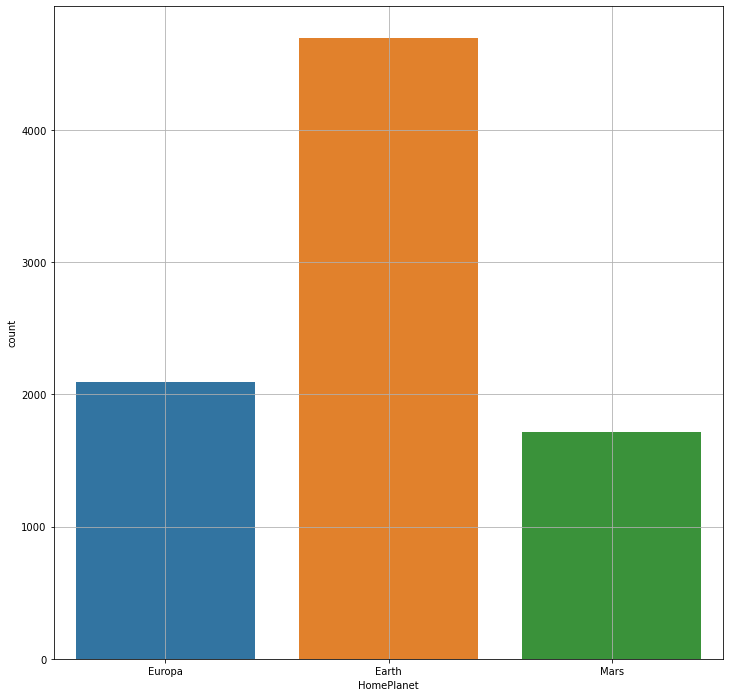

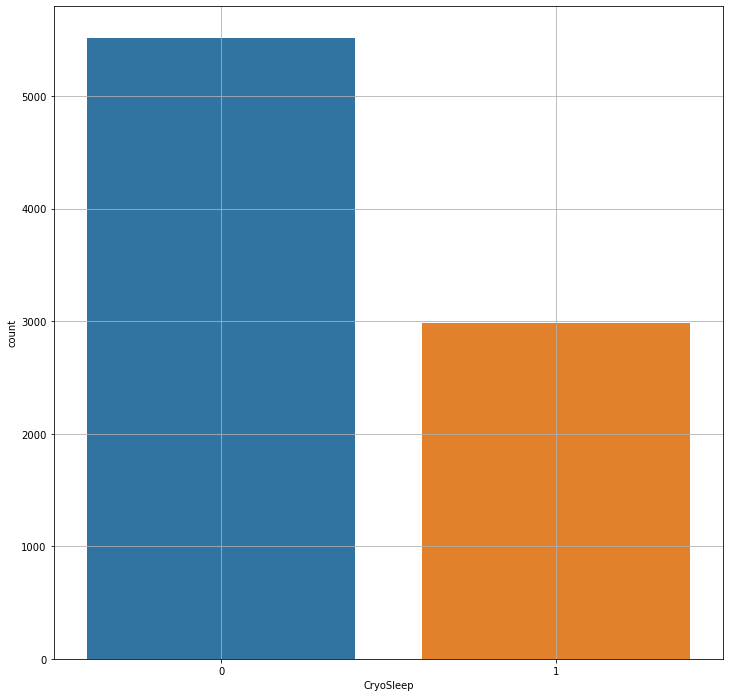

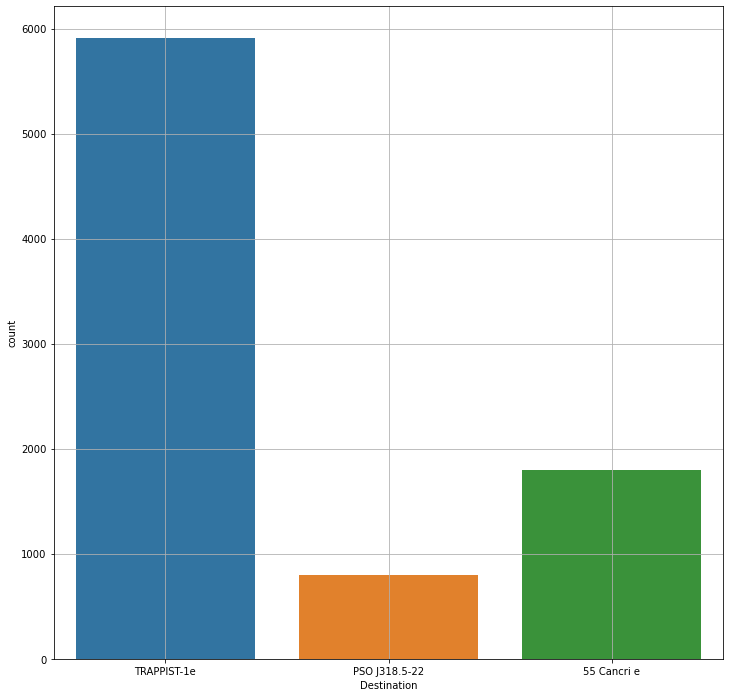

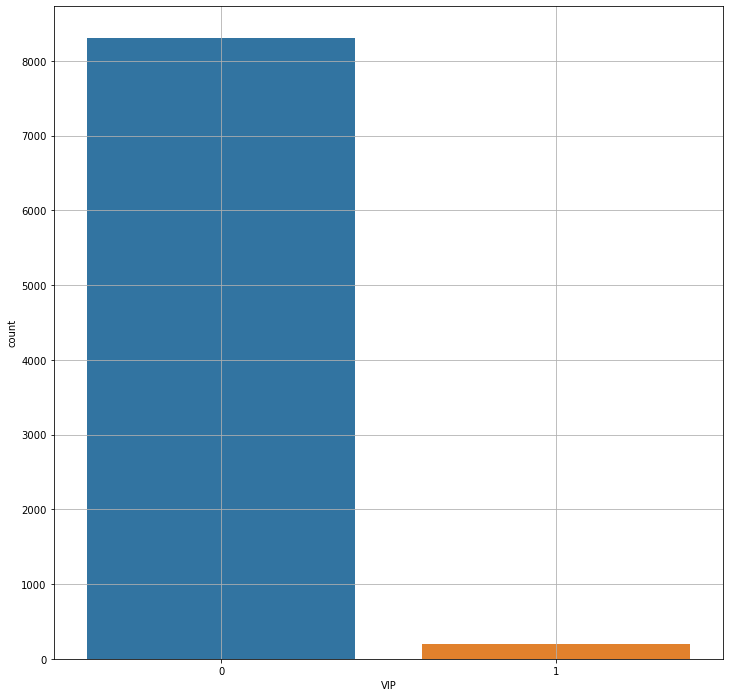

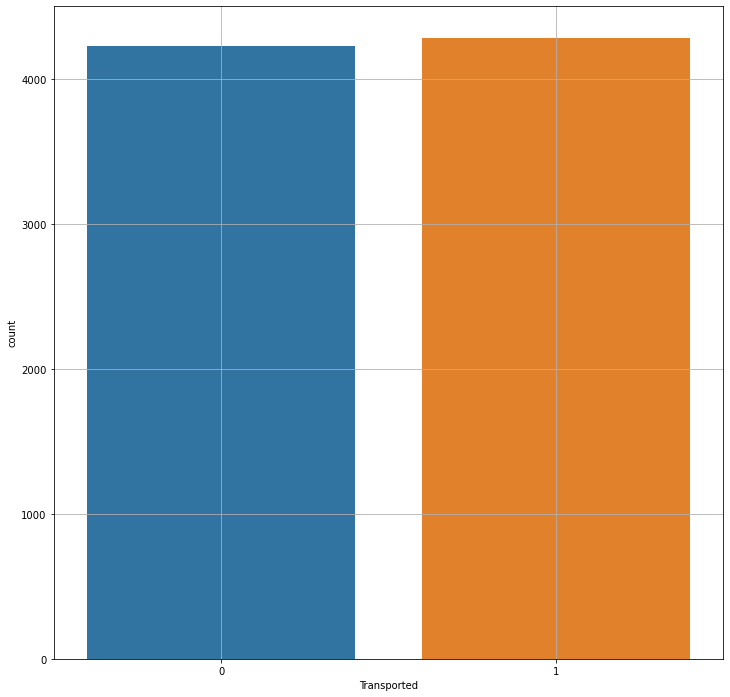

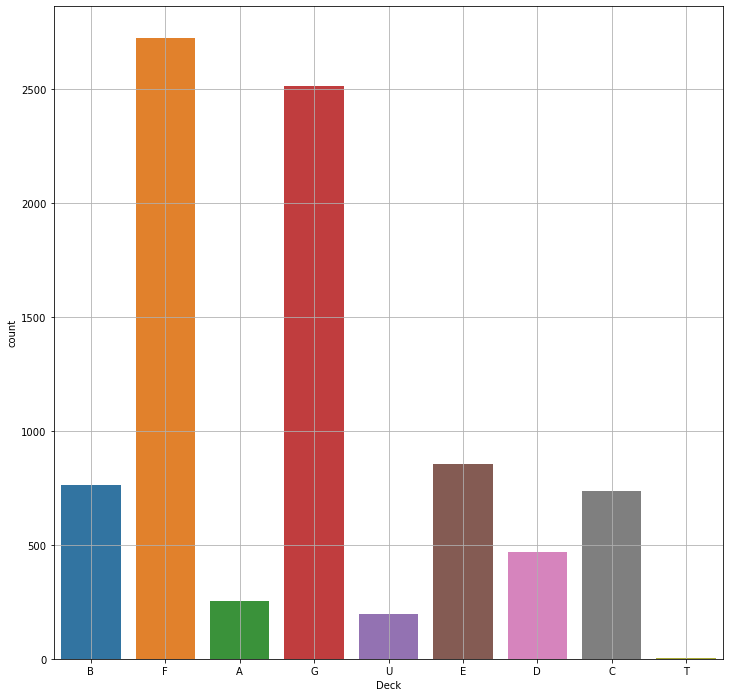

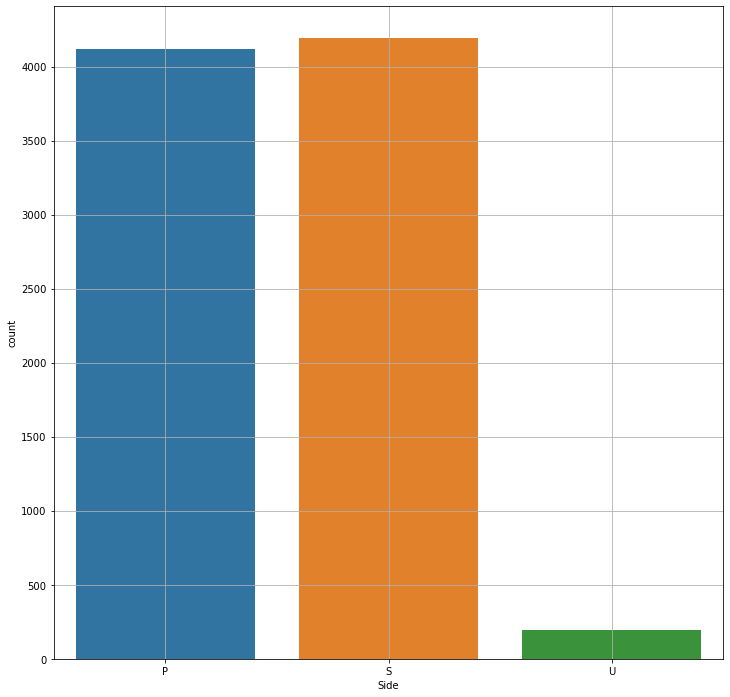

In [195]:
for col in qual_meansures:
    plt.figure(figsize=(12, 12))
    sns.countplot(x = col, data = train)
    plt.grid()
    plt.show

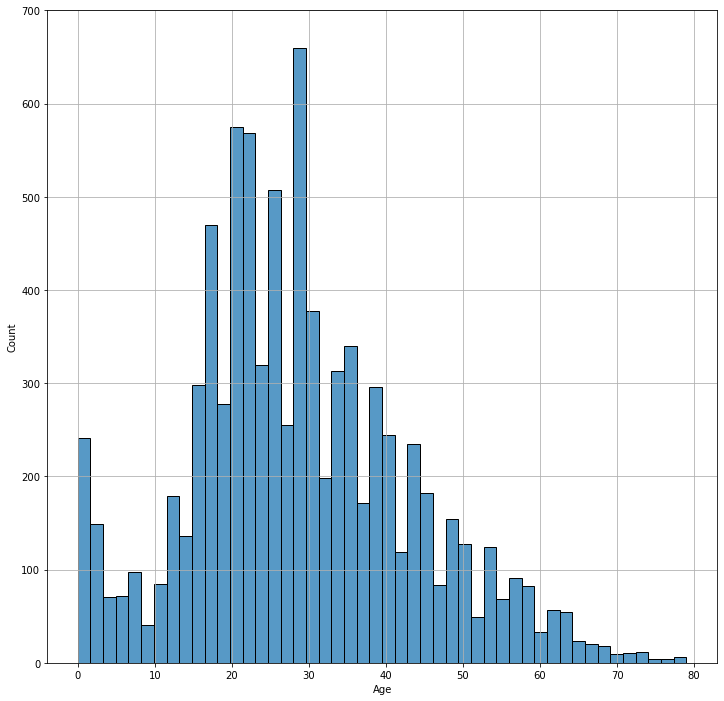

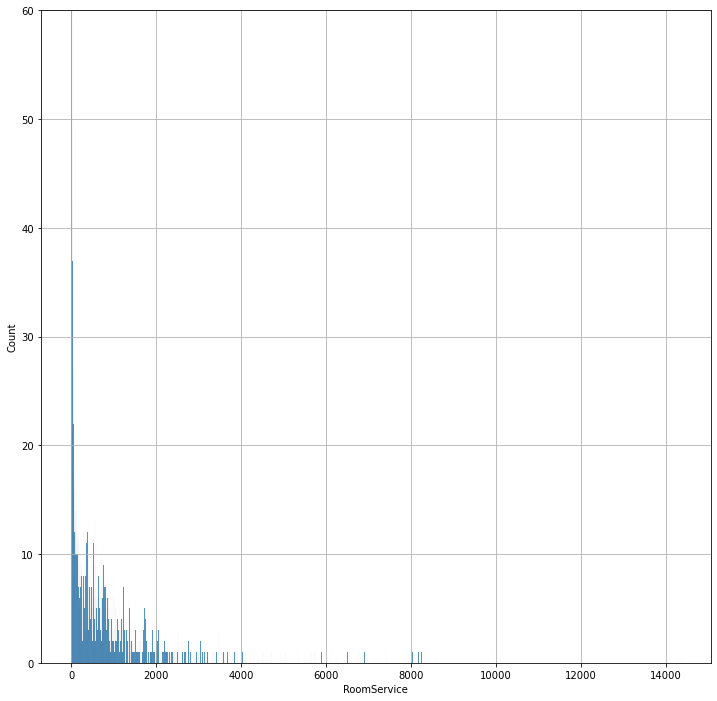

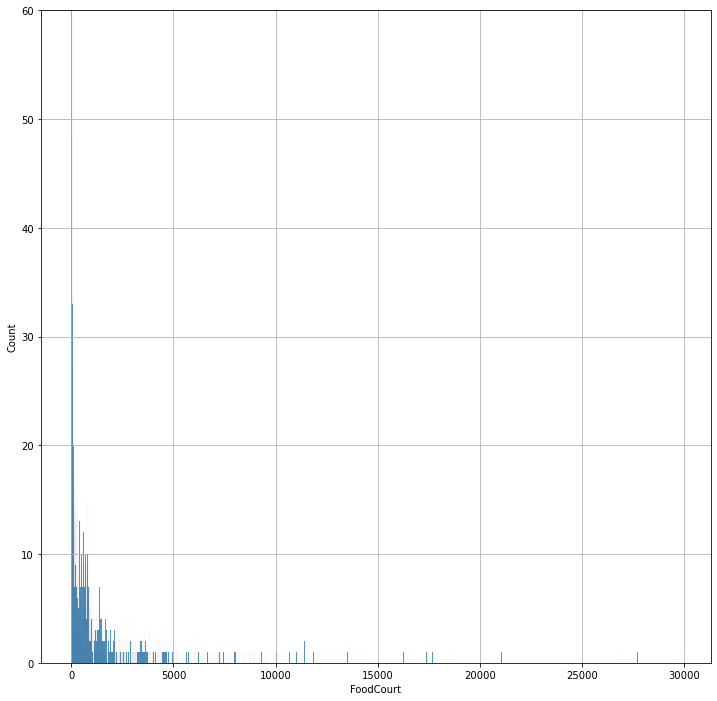

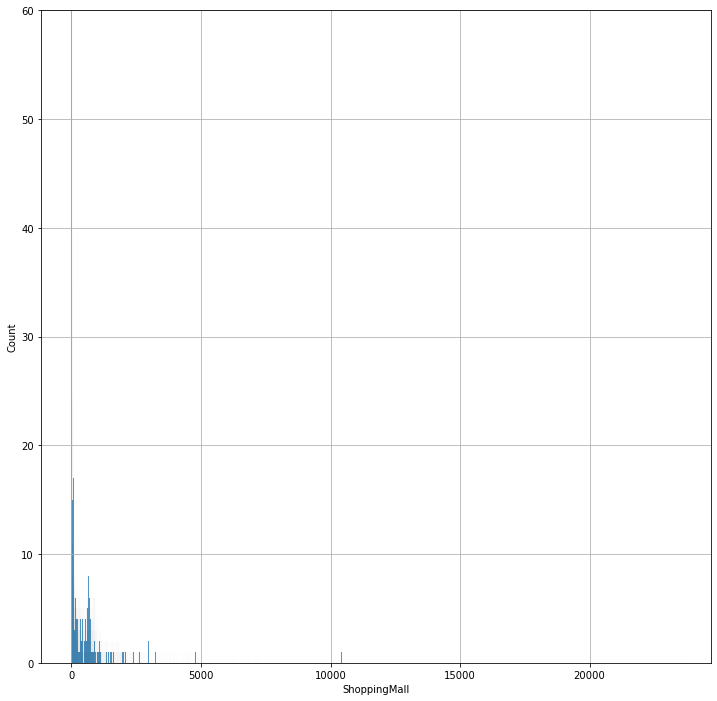

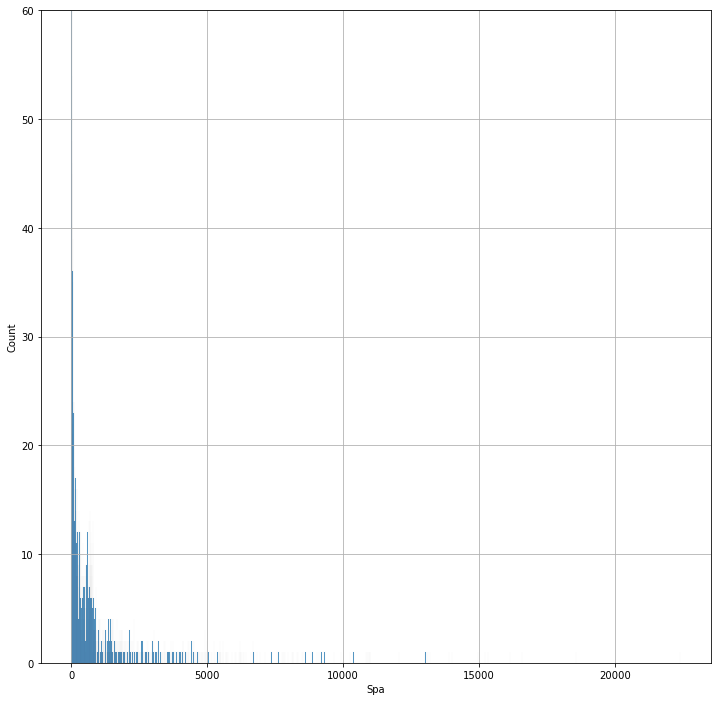

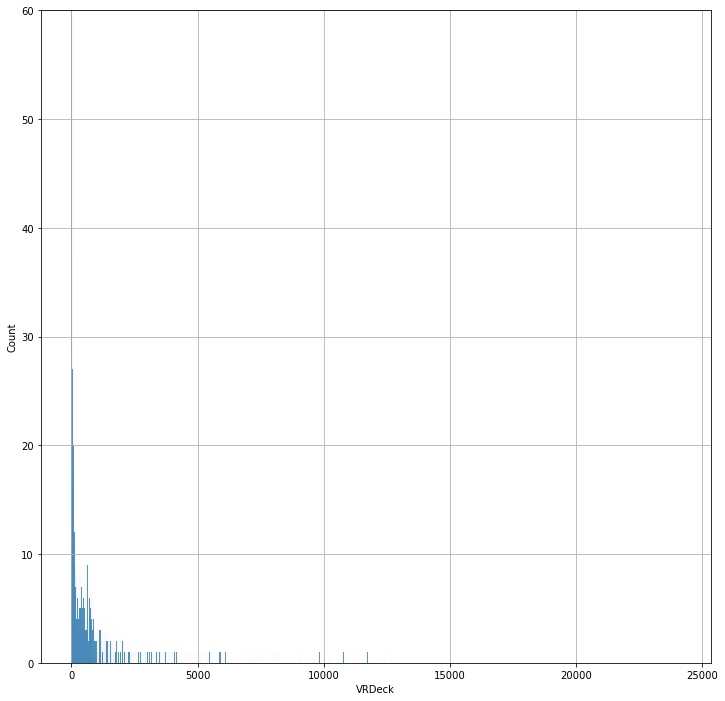

In [196]:
for col in quan_measures:
    if col != 'Age':
        plt.figure(figsize=(12, 12))
        sns.histplot(train[col])
        plt.ylim(0, 60)
    else: 
        plt.figure(figsize=(12, 12))
        sns.histplot(train[col])
        plt.ylim(0, 700)
    plt.grid()
    plt.show

In [197]:
train_dummies = pd.get_dummies(train[["HomePlanet", "Destination", 'Deck', 'Side']])
train_dummies["PassengerId"] = train['PassengerId']
train = pd.merge(train, train_dummies, on = "PassengerId", how = "left")
train = train.drop(["HomePlanet", "Destination", 'Deck', 'Side'], axis = 1)
del train_dummies

In [198]:
test_dummies = pd.get_dummies(test[["HomePlanet", "Destination", 'Deck', 'Side']])
test_dummies["PassengerId"] = test['PassengerId']
test = pd.merge(test, test_dummies, on = "PassengerId", how = "left")
test = test.drop(["HomePlanet", "Destination", 'Deck', 'Side'], axis = 1)
del test_dummies

In [199]:
train.rename(columns = {'Deck_U':'Cabin_Unknown'}, inplace = True)
train = train.drop(["Side_U"], axis = 1)
test.rename(columns = {'Deck_U':'Cabin_Unknown'}, inplace = True)
test = test.drop(["Side_U"], axis = 1)

In [200]:
train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Cabin_Unknown,Side_P,Side_S
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,1,0,0,0,0,0,0,0,1,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,0,0,0,1,0,0,0,0,1
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0,0,0,0,0,0,0,0,0,1
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0,0,0,0,0,0,0,0,0,1
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0,0,0,0,1,0,0,0,0,1


In [201]:
test.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Cabin_Unknown,Side_P,Side_S
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,...,0,0,0,0,0,1,0,0,0,1
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,...,0,0,0,0,1,0,0,0,0,1
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,...,0,1,0,0,0,0,0,0,0,1
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,...,0,1,0,0,0,0,0,0,0,1
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,...,0,0,0,0,1,0,0,0,0,1


In [202]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8511 entries, 0 to 8510
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8511 non-null   object 
 1   CryoSleep                  8511 non-null   int32  
 2   Age                        8511 non-null   float64
 3   VIP                        8511 non-null   int32  
 4   RoomService                8511 non-null   float64
 5   FoodCourt                  8511 non-null   float64
 6   ShoppingMall               8511 non-null   float64
 7   Spa                        8511 non-null   float64
 8   VRDeck                     8511 non-null   float64
 9   Name                       8511 non-null   object 
 10  Transported                8511 non-null   int32  
 11  Cabin_Number               8511 non-null   int32  
 12  HomePlanet_Earth           8511 non-null   uint8  
 13  HomePlanet_Europa          8511 non-null   uint8

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

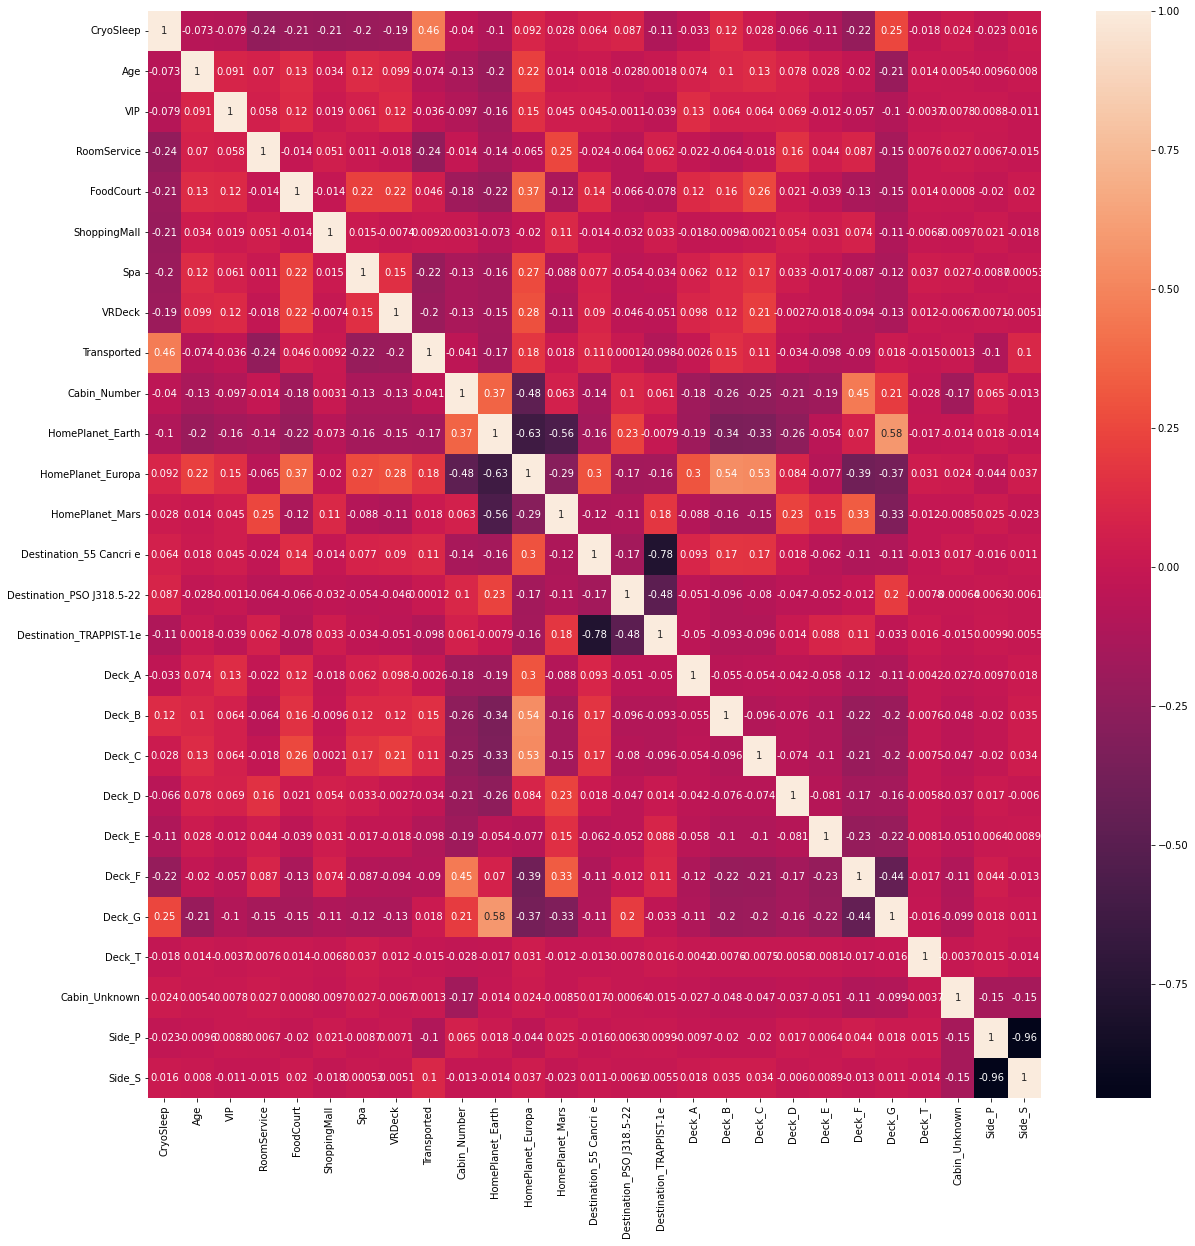

In [204]:
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), annot=True)
plt.plot